In [55]:
import pandas as pd
import os
import shutil
import re
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

from persim import plot_diagrams
from ripser import ripser, lower_star_img
import os
import torch as tc
import torchvision as tv
import cv2 
from skimage import io
import skimage.morphology as morphology
import scipy.ndimage as ndimage
from skimage.morphology import square
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import math
from persim import PersImage
from persim import PersistenceImager
from ripser import Rips
import pickle
from os import listdir
from os.path import isfile, join
import preprocessing_project as pre

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [56]:
path_to_dataset = f'..\\ProjektTOM\\computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.0.0\\Patients_CT\\049\\brain'

num = 1
array = np.array([])
_ ,_,files = next(os.walk(path_to_dataset))
files.sort(key=natural_keys)
for f in files:
    if f == str(num)+'.jpg':
        path = os.path.join(path_to_dataset, f)
        num += 1
        image = io.imread(path)
        image = pre.real_noise_cancel(image)
        image = cv2.resize(image, (128, 128))
        array = np.append(array, image)
    

array = array.reshape(num-1,128, 128)
print(array.shape)

(33, 128, 128)


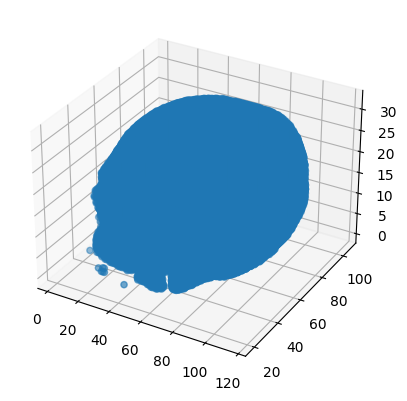

In [65]:
fig = plt.figure()
ax = plt.axes(projection='3d')

brain = pre.binarize_jan(array, 256, 248)
coords = np.nonzero(brain)  

ax.scatter3D( coords[1], coords[2],coords[0])

(324209, 3)
200
(5603, 3)
200
(5401, 3)
200
(5848, 3)
200
(6678, 3)
200
(10736, 3)
200
(31916, 3)
200
(38865, 3)
200
(34455, 3)
200
(15002, 3)
200
(8668, 3)
200
(5009, 3)
200
(3132, 3)
200
(2232, 3)
200
(2399, 3)
200
(50801, 3)
200


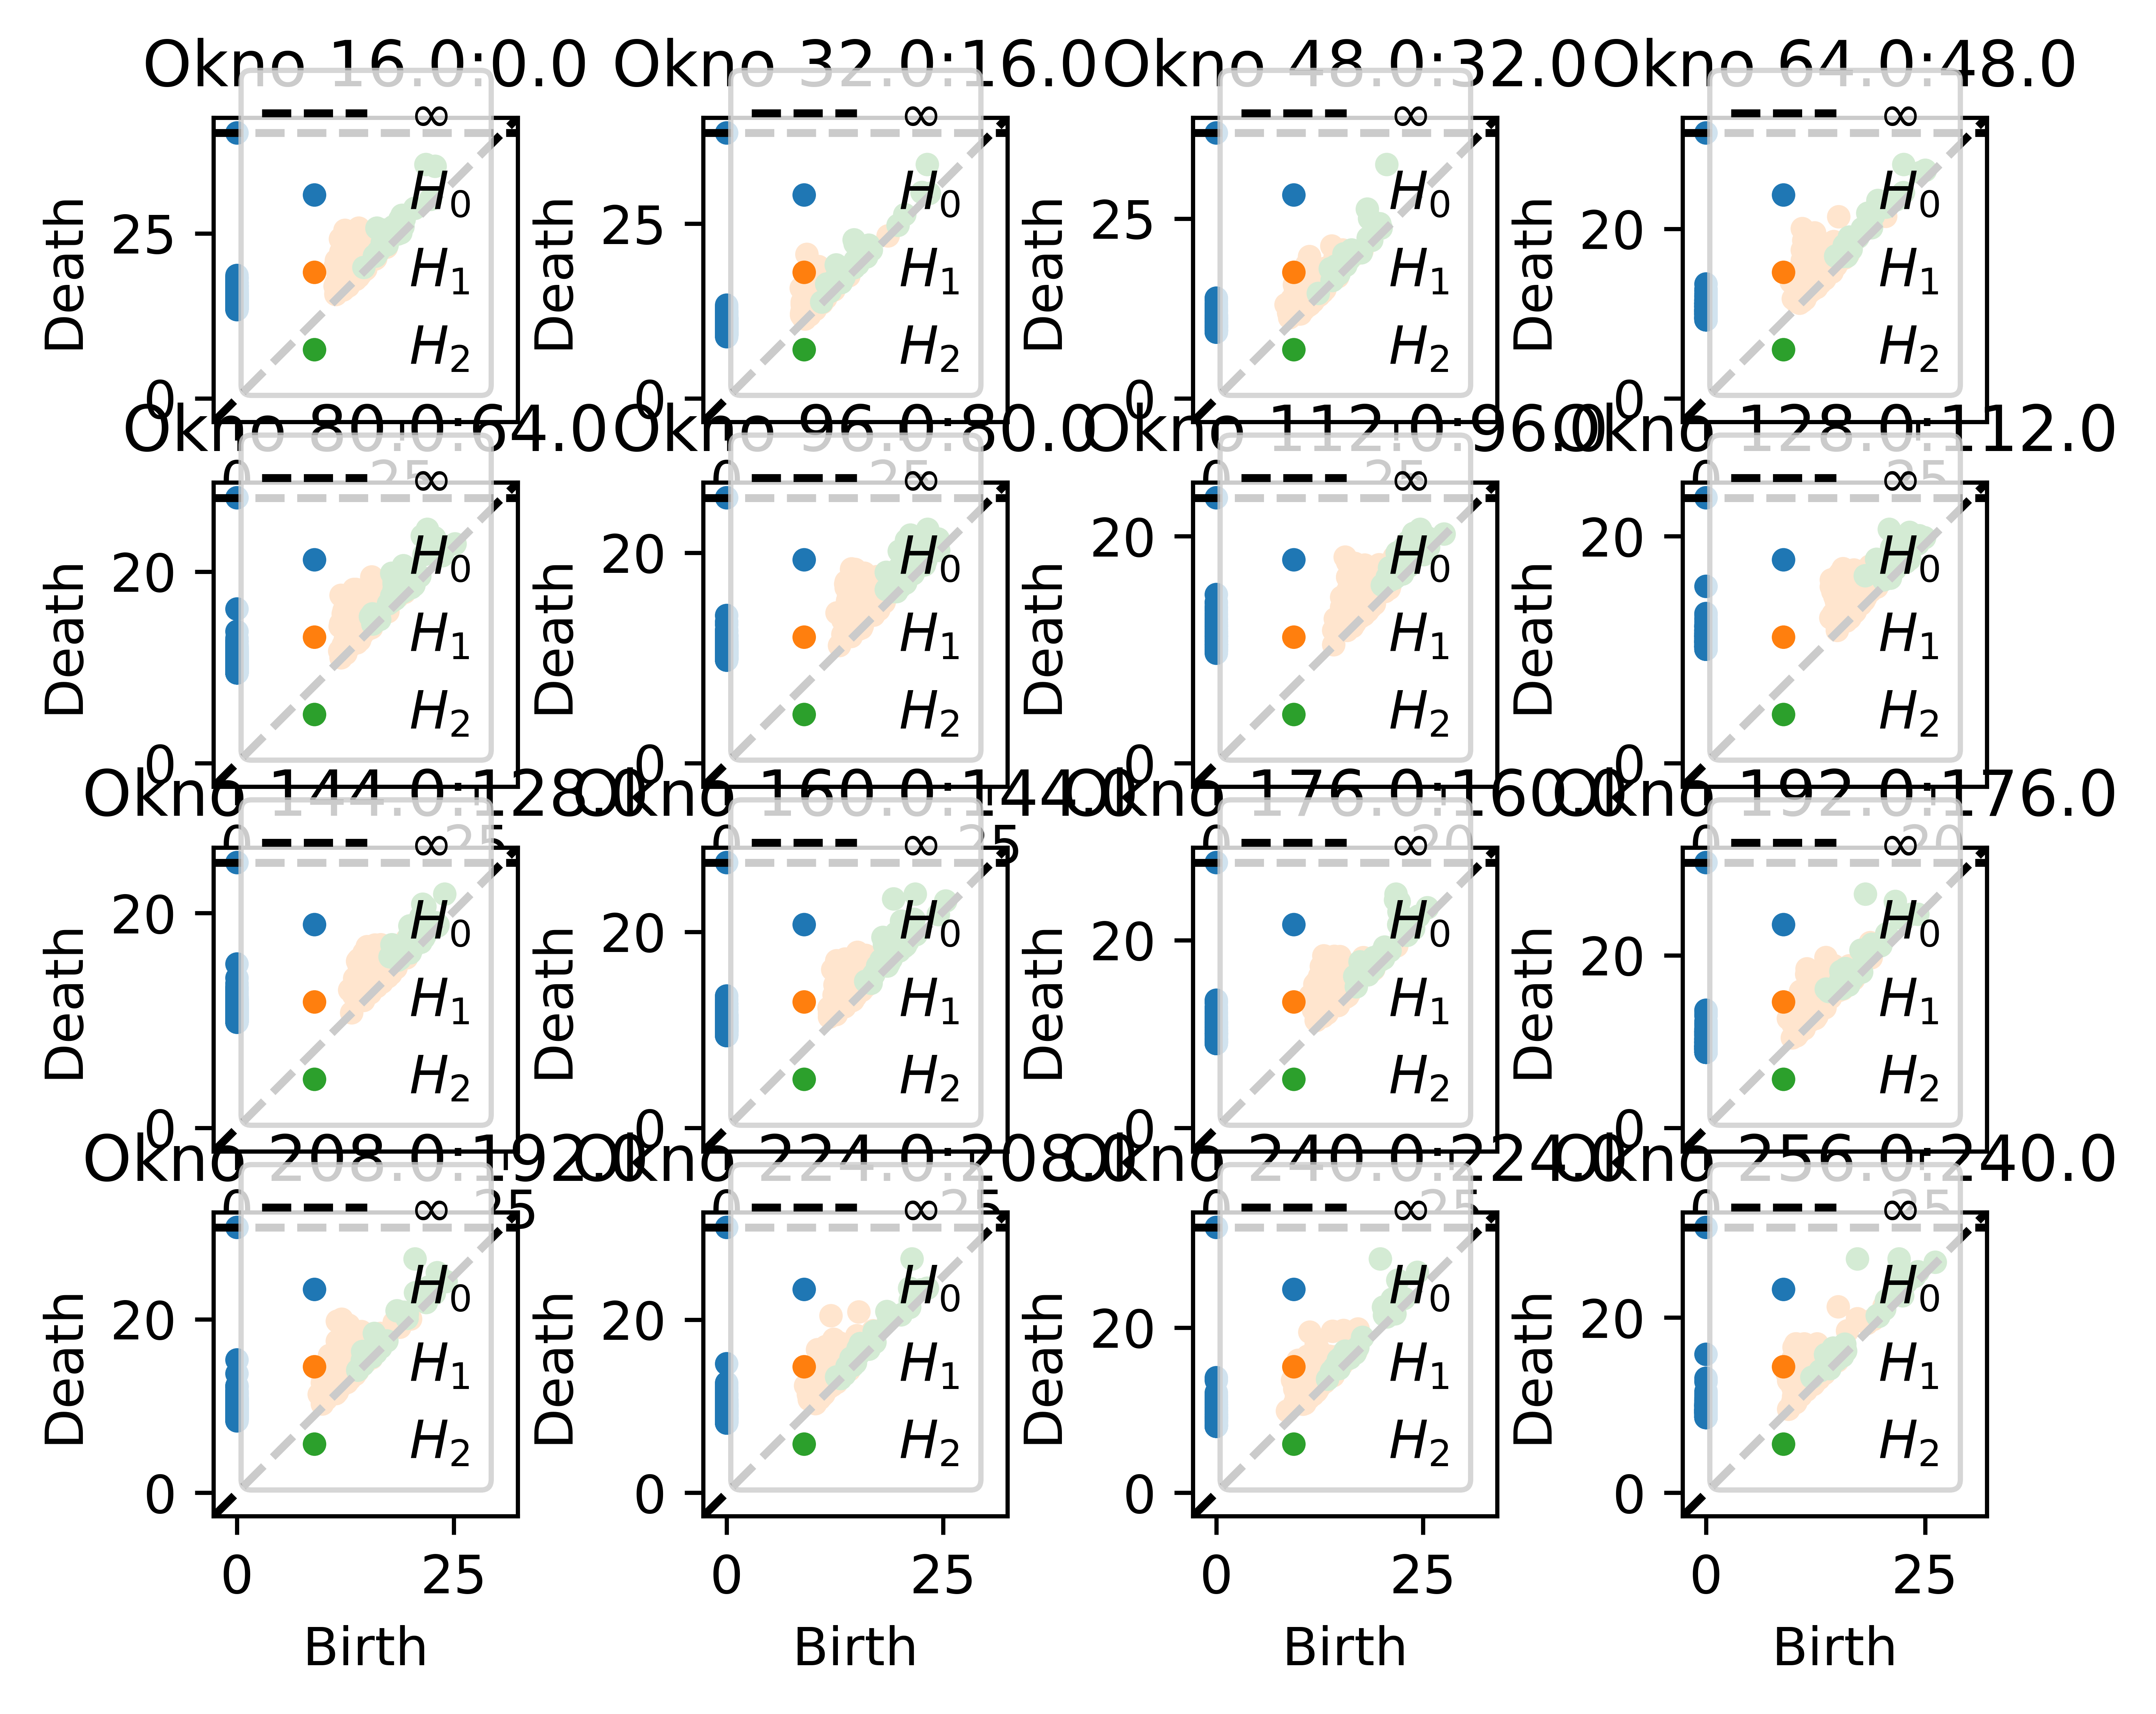

In [77]:
from persim import PersImage
from persim import PersistenceImager
from ripser import Rips
high = 256
low = 0
bins = 16
dx = (high-low)/bins

plt.figure(dpi = 1000)
dg = []
obrazy = []
for i in range(bins):
    ax = plt.subplot(4, 4, i+1)
    a, b = low+(i+1)*dx, low+i*dx
    img = pre.binarize_jan(array, a, b)
   
    coords = np.nonzero(img)  
    #coords = np.array([coords[0], coords[1], coords[2]])
    
    coords = [(y,x, z) for y,x, z in zip(coords[0], coords[1], coords[2]) ]
    coords = np.array(coords)
    print(coords.shape)
    

    num = min(200, len(coords.flatten()))
    print(num)
    if num != 0:
        res = ripser(coords,maxdim=2, n_perm=num, thresh = 128)
        dgms_sub = res['dgms']
        dg.append(dgms_sub)
        plot_diagrams(dgms_sub)
       
        
        ax.set_title("Okno "+str(a)+":"+str(b))  
    else:
        pass